Машинное обучение (семинары в записи)

Урок 2. Регрессия на практике

Ссылка на набор данных.

Пусть у нас имеется некоторый набор данных sales.csv о продажах квартир.

— цена продажи (SalePrice, зависимая переменная),

— наземная жилая зона (GrLivArea),

— общее качество (Overall Quality),

— территория гаража (GarageArea),

— условия сделки (SaleCondition).

Реализуйте построение модели линейной регрессии на этих данных. Проверьте качество модели на обучающей и тестовой выборках с помощью MAE, MSE.

In [1]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# 1. Загрузка данных
data = pd.read_csv('sales.csv')

data.head()


,SalePrice,GrLivArea,GarageArea,OverallQual,Street,SaleCondition
0,208500,1710,548,7,Pave,Normal
1,181500,1262,460,6,Pave,Normal
2,223500,1786,608,7,Pave,Normal
3,140000,1717,642,7,Pave,Abnorml
4,250000,2198,836,8,Pave,Normal


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   SalePrice      1460 non-null   int64 
 1   GrLivArea      1460 non-null   int64 
 2   GarageArea     1460 non-null   int64 
 3   OverallQual    1460 non-null   int64 
 4   Street         1460 non-null   object
 5   SaleCondition  1460 non-null   object
dtypes: int64(4), object(2)
memory usage: 68.6+ KB


Из общей информации следует:

Всего 6 колонок, DataFrame содержит 1460 записи, от 0 до 1459

Нулевые значения отсуствуют

Пропущеные значения отсуствуют

Колонки: SalePrice, GrLivArea, GarageArea, OverallQual находятся в целочисленых значениях int64

Колонки: Street, SaleCondition являются объектами object

In [24]:
# 2. Статистический анализ числовых переменных
print("Статистический анализ числовых переменных:")
print(data.describe())

Статистический анализ числовых переменных:
           SalePrice    GrLivArea   GarageArea  OverallQual
count    1460.000000  1460.000000  1460.000000  1460.000000
mean   180921.195890  1515.463699   472.980137     6.099315
std     79442.502883   525.480383   213.804841     1.382997
min     34900.000000   334.000000     0.000000     1.000000
25%    129975.000000  1129.500000   334.500000     5.000000
50%    163000.000000  1464.000000   480.000000     6.000000
75%    214000.000000  1776.750000   576.000000     7.000000
max    755000.000000  5642.000000  1418.000000    10.000000


In [25]:
# 3. Статистический анализ объектных признаков
print("\nСтатистический анализ объектных переменных:")
print(data.select_dtypes(include=['object']).describe())


Статистический анализ объектных переменных:
       Street SaleCondition
count    1460          1460
unique      2             6
top      Pave        Normal
freq     1454          1198


In [26]:
# 4. Проверяем на дубликаты
duplicates_count = data.duplicated().sum()
print(f"\nКоличество дубликатов: {duplicates_count}")


Количество дубликатов: 1


In [27]:
# 5. Просмотр дубликатов (если есть)
if duplicates_count > 0:
    print("\nДубликаты:")
    print(data[data.duplicated()])


Дубликаты:
     SalePrice  GrLivArea  GarageArea  OverallQual Street SaleCondition
831     151000       1200         480            7   Pave        Normal


In [28]:
# 6. Удаляем дубликаты из DataFrame
data = data.drop_duplicates()

In [29]:
# 7. Проверяем на дубликаты после удаления
print(f"\nКоличество дубликатов после удаления: {data.duplicated().sum()}")


Количество дубликатов после удаления: 0


In [30]:
# 8. Проверка на нулевые значения
print("\nПроверка на нулевые значения:")
print(data.isnull().sum())


Проверка на нулевые значения:
SalePrice        0
GrLivArea        0
GarageArea       0
OverallQual      0
Street           0
SaleCondition    0
dtype: int64


In [31]:
# 9. Проверка на NaN значения
print("\nПроверка на NaN значения:")
print(data.isna().sum())


Проверка на NaN значения:
SalePrice        0
GrLivArea        0
GarageArea       0
OverallQual      0
Street           0
SaleCondition    0
dtype: int64


In [33]:
# 10. Создание копии оригинального DataFrame
data_encoder = data_cleaned.copy()

In [34]:
# 11. Создание копии оригинального DataFrame
data_encoder = data_cleaned.copy()

LabelEncoder_selected_columns = data_encoder.loc[:, ['Street', 'SaleCondition']]
# Создание LabelEncoder объекта
label_encoder = LabelEncoder()

# Кодирование столбцов
encoded_columns = {}
for column in LabelEncoder_selected_columns:
    data_encoder[column + '_encoded'] = label_encoder.fit_transform(data_encoder[column])
    # Сохраняем маппинг
    encoded_columns[column] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Вывод легенды кодировки для каждого столбца
for column, mapping in encoded_columns.items():
    print(f"Кодировка для {column}:", mapping)

Кодировка для Street: {'Grvl': 0, 'Pave': 1}
Кодировка для SaleCondition: {'Abnorml': 0, 'AdjLand': 1, 'Alloca': 2, 'Family': 3, 'Normal': 4, 'Partial': 5}


In [35]:
data_encoder.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1459 entries, 0 to 1459
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   SalePrice              1459 non-null   int64 
 1   GrLivArea              1459 non-null   int64 
 2   GarageArea             1459 non-null   int64 
 3   OverallQual            1459 non-null   int64 
 4   Street                 1459 non-null   object
 5   SaleCondition          1459 non-null   object
 6   Street_encoded         1459 non-null   int64 
 7   SaleCondition_encoded  1459 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 102.6+ KB


In [36]:
# 12. Удаление категориальных признаков
data_encoder.drop(['Street', 'SaleCondition'], axis=1, inplace=True)

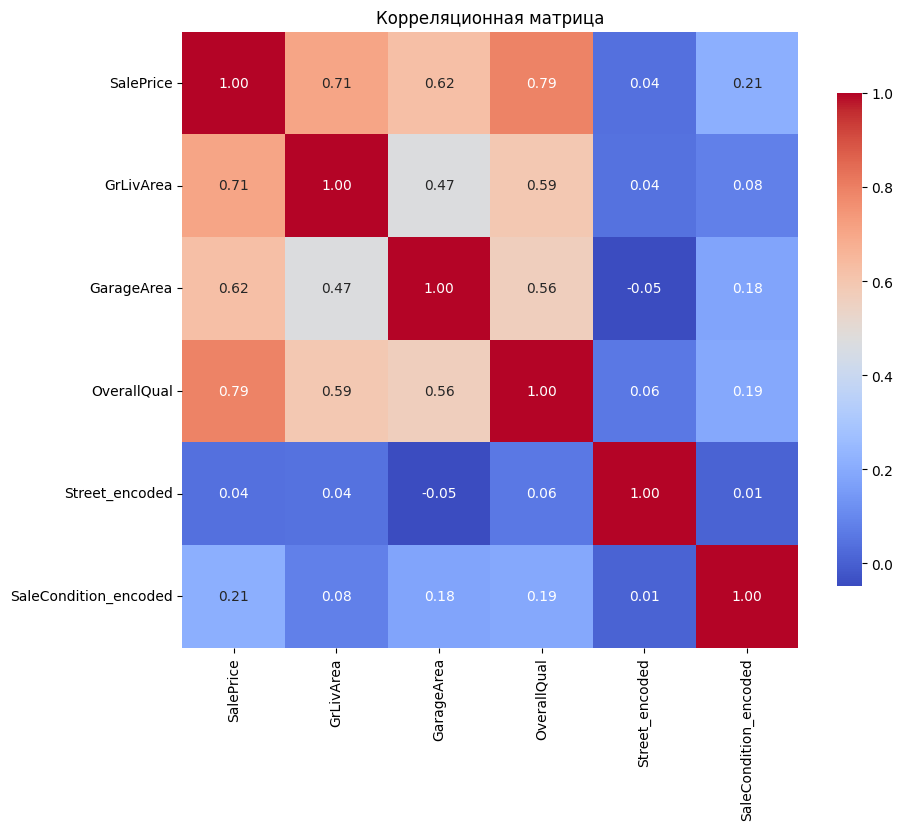

In [40]:
# 13. # Визуализация распределения нескольких выбранных числовых переменных
correlation_matrix_selected_columns = ['SalePrice', 'GrLivArea', 'GarageArea', 'OverallQual', 'Street_encoded', 'SaleCondition_encoded']

# Визуализация корреляции между выбранными переменными
correlation_matrix = data_encoder[correlation_matrix_selected_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Корреляционная матрица')
plt.show()

In [51]:
numerical_columns = ['SalePrice', 'GrLivArea', 'GarageArea', 'OverallQual']

# 14. Масштабирование числовых переменных
# Инициализация StandardScaler для стандартизации данных
scaler = StandardScaler()

# Масштабируем числовые переменные и преобразуем их в DataFrame
scaled_numerical = scaler.fit_transform(data[numerical_columns])
scaled_numerical_data = pd.DataFrame(scaled_numerical, columns=numerical_columns)

In [55]:
# Определение независимых и зависимых переменных
X = scaled_numerical_data.drop(["SalePrice"], axis=1) # Независимые переменные
y = scaled_numerical_data['SalePrice']  # Зависимая переменная

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Выводим размеры
print(X)
print("Размер обучающего набора:", X_train.shape)
print("Размер тестового набора:", X_test.shape)

      GrLivArea  GarageArea  OverallQual
0      0.369841    0.350903     0.651797
1     -0.482818   -0.060688    -0.071376
2      0.514488    0.631533     0.651797
3      0.383164    0.790556     0.651797
4      1.298630    1.697926     1.374970
...         ...         ...          ...
1454   0.249936   -0.060688    -0.071376
1455   1.060723    0.126399    -0.071376
1456   1.568892   -1.033538     0.651797
1457  -0.833017   -1.089664    -0.794548
1458  -0.494237   -0.921286    -0.794548

[1459 rows x 3 columns]
Размер обучающего набора: (1167, 3)
Размер тестового набора: (292, 3)


In [42]:
# 15. Масштабирование числовых переменных
scaler = StandardScaler()
numerical_features = ['GrLivArea', 'GarageArea', 'OverallQual']
scaled_features = scaler.fit_transform(data_cleaned[numerical_features])

# Преобразуем отмасштабированные данные обратно в DataFrame
scaled_features_df = pd.DataFrame(scaled_features, columns=numerical_features, index=data_cleaned.index)
data_cleaned.update(scaled_features_df)

<ipython-input-42-a46fbf26a69f>:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.36984083 -0.48281779  0.51448828 ...  1.56889202 -0.83301687
 -0.49423732]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data_cleaned.update(scaled_features_df)
<ipython-input-42-a46fbf26a69f>:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.35090273 -0.06068773  0.63153259 ... -1.0335379  -1.08966387
 -0.92128596]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data_cleaned.update(scaled_features_df)
<ipython-input-42-a46fbf26a69f>:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.65179728 -0.07137552  0.65179728 ...  0.65179728 -0.79454832
 -0.79454832]' has dtype incompatible with int64, please e

In [43]:
# 16. Разделение данных на обучающую и тестовую выборки
X = data_cleaned.drop(columns=['SalePrice'])
y = data_cleaned['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Выводим размеры выборок
print(f"\nРазмеры выборок: X_train = {X_train.shape}, X_test = {X_test.shape}, y_train = {y_train.shape}, y_test = {y_test.shape}")


Размеры выборок: X_train = (1167, 5), X_test = (292, 5), y_train = (1167,), y_test = (292,)


In [57]:
# 17. Построение модели линейной регрессии
model = LinearRegression()

In [58]:
# 18. Обучение модели на обучающей выборке
model.fit(X_train, y_train)

LinearRegression()

In [59]:
# 19. Предсказание цен на обучающей выборке
y_train_pred = model.predict(X_train)

In [60]:
# 20. Расчет метрик качества на обучающей выборке
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
print(f"\nКачество модели на обучающей выборке: MAE = {mae_train:.2f}, MSE = {mse_train:.2f}")



Качество модели на обучающей выборке: MAE = 0.34, MSE = 0.28


In [61]:
# 21. Предсказание цен на тестовой выборке
y_test_pred = model.predict(X_test)

In [62]:
# 22. Расчет метрик качества на тестовой выборке
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print(f"Качество модели на тестовой выборке: MAE = {mae_test:.2f}, MSE = {mse_test:.2f}")

Качество модели на тестовой выборке: MAE = 0.32, MSE = 0.18


In [30]:
# 23. Вывод результатов
print("\nМодель линейной регрессии построена и оценена.")


Модель линейной регрессии построена и оценена.


Стандартизация данных оказалась важной для успешного обучения модели. Поскольку признаки имеют разные масштабы следовательно им требуется стандартизация, которая помогает модели адекватно понимать данные. Значения MAE и MSE на тестовой выборке немного выше, чем на обучающей выборке, что может указывать на небольшое переобучение модели.